<a href="https://colab.research.google.com/github/Vignesh2216/CNN-Based-Music-Instrument-Recognition-System/blob/main/InstruNet_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import os

base_path = "/content/InstruNet-AI"

folders = [
    "data/raw_audio/IRMAS",
    "data/spectrograms",
    "preprocessing",
    "model",
    "visualization",
    "reports"
]

for folder in folders:
    os.makedirs(os.path.join(base_path, folder), exist_ok=True)

print("Project folder structure created!")


Project folder structure created!


In [ ]:
!unzip "/content/gdrive/MyDrive/IRMAS dataset/archive (2).zip" -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/IRMAS-TrainingData/gac/[gac][pop_roc]0547__2.wav  
  inflating: /content/IRMAS-TrainingData/gac/[gac][pop_roc]0547__3.wav  
  inflating: /content/IRMAS-TrainingData/gac/[gac][pop_roc]0550__1.wav  
  inflating: /content/IRMAS-TrainingData/gac/[gac][pop_roc]0550__2.wav  
  inflating: /content/IRMAS-TrainingData/gac/[gac][pop_roc]0550__3.wav  
  inflating: /content/IRMAS-TrainingData/gac/[gac][pop_roc]0556__1.wav  
  inflating: /content/IRMAS-TrainingData/gac/[gac][pop_roc]0556__2.wav  
  inflating: /content/IRMAS-TrainingData/gac/[gac][pop_roc]0556__3.wav  
  inflating: /content/IRMAS-TrainingData/gac/[gac][pop_roc]0557__1.wav  
  inflating: /content/IRMAS-TrainingData/gac/[gac][pop_roc]0557__2.wav  
  inflating: /content/IRMAS-TrainingData/gac/[gac][pop_roc]0557__3.wav  
  inflating: /content/IRMAS-TrainingData/gac/[gac][pop_roc]0558__1.wav  
  inflating: /content/IRMAS-TrainingData/gac/[gac][pop_roc]0558__2.wav  


In [ ]:
!ls /content/IRMAS-TrainingData | head


cel
cla
flu
gac
gel
org
pia
README.txt
sax
tru


In [ ]:
!ls /content/InstruNet-AI


data  model  preprocessing  reports  visualization


In [ ]:
!mkdir -p /content/InstruNet-AI/data/raw_audio


In [ ]:
!mv /content/IRMAS-TrainingData/pia /content/InstruNet-AI/data/raw_audio/
!mv /content/IRMAS-TrainingData/gac /content/InstruNet-AI/data/raw_audio/
!mv /content/IRMAS-TrainingData/gel /content/InstruNet-AI/data/raw_audio/
!mv /content/IRMAS-TrainingData/sax /content/InstruNet-AI/data/raw_audio/
!mv /content/IRMAS-TrainingData/tru /content/InstruNet-AI/data/raw_audio/


In [ ]:
!ls /content/InstruNet-AI/data/raw_audio


gac  gel  IRMAS  pia  sax  tru


In [ ]:
import os

piano_folder = "/content/InstruNet-AI/data/raw_audio/pia"
audio_file = os.listdir(piano_folder)[0]
audio_path = os.path.join(piano_folder, audio_file)

audio_path


'/content/InstruNet-AI/data/raw_audio/pia/[pia][cla]1346__2.wav'

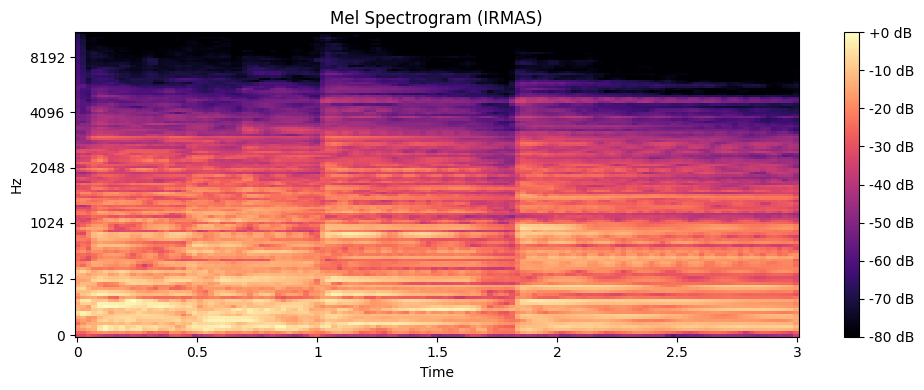

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

y, sr = librosa.load(audio_path, mono=True)

mel = librosa.feature.melspectrogram(
    y=y,
    sr=sr,
    n_mels=128,
    n_fft=2048,
    hop_length=512
)

mel_db = librosa.power_to_db(mel, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(
    mel_db,
    sr=sr,
    hop_length=512,
    x_axis="time",
    y_axis="mel",
    cmap="magma"
)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram (IRMAS)")
plt.tight_layout()
plt.show()


In [ ]:
!mkdir -p /content/InstruNet-AI/data/spectrograms


In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

RAW_AUDIO_PATH = "/content/InstruNet-AI/data/raw_audio"
SPEC_PATH = "/content/InstruNet-AI/data/spectrograms"

def save_mel_spectrogram(audio_path, save_path):
    y, sr = librosa.load(audio_path, mono=True)

    mel = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_mels=128,
        n_fft=2048,
        hop_length=512
    )

    mel_db = librosa.power_to_db(mel, ref=np.max)

    plt.figure(figsize=(3, 3))
    librosa.display.specshow(
        mel_db,
        sr=sr,
        hop_length=512,
        cmap="magma"
    )
    plt.axis("off")
    plt.savefig(save_path, bbox_inches="tight", pad_inches=0)
    plt.close()

# Get top-level directories under RAW_AUDIO_PATH
top_level_folders = [name for name in os.listdir(RAW_AUDIO_PATH) if os.path.isdir(os.path.join(RAW_AUDIO_PATH, name))]
print(f"Top-level folders detected: {top_level_folders}")

for folder_name in top_level_folders:
    current_raw_audio_dir = os.path.join(RAW_AUDIO_PATH, folder_name)
    print(f"\nChecking folder: {folder_name} at path {current_raw_audio_dir}")

    if folder_name == "IRMAS": # Special handling for the nested IRMAS folder
        print(f"Entered IRMAS special handling for {folder_name}")
        # Iterate through subfolders within IRMAS (actual instrument folders)
        sub_instrument_folders = [name for name in os.listdir(current_raw_audio_dir) if os.path.isdir(os.path.join(current_raw_audio_dir, name))]
        print(f"Sub-instrument folders in IRMAS: {sub_instrument_folders}")
        for sub_inst_name in sub_instrument_folders:
            input_folder = os.path.join(current_raw_audio_dir, sub_inst_name)
            output_folder = os.path.join(SPEC_PATH, sub_inst_name) # Save spectrograms under the actual instrument name

            os.makedirs(output_folder, exist_ok=True)

            files = os.listdir(input_folder)
            wav_files = [f for f in files if f.endswith(".wav")]
            print(f"Processing {sub_inst_name} (from IRMAS) - {len(wav_files)} WAV files")

            for file in wav_files:
                audio_path = os.path.join(input_folder, file)
                spec_name = file.replace(".wav", ".png")
                save_path = os.path.join(output_folder, spec_name)
                save_mel_spectrogram(audio_path, save_path)
    else: # Direct instrument folders (pia, gac, gel, sax, tru)
        print(f"Entered general handling for {folder_name}")
        input_folder = current_raw_audio_dir
        output_folder = os.path.join(SPEC_PATH, folder_name) # Save spectrograms under the instrument name

        os.makedirs(output_folder, exist_ok=True)

        files = os.listdir(input_folder)
        wav_files = [f for f in files if f.endswith(".wav")]
        print(f"Processing {folder_name} - {len(wav_files)} WAV files")

        for file in wav_files:
            audio_path = os.path.join(input_folder, file)
            spec_name = file.replace(".wav", ".png")
            save_path = os.path.join(output_folder, spec_name)
            save_mel_spectrogram(audio_path, save_path)


Top-level folders detected: ['pia', 'gac', 'gel', 'IRMAS', 'tru', 'sax']

Checking folder: pia at path /content/InstruNet-AI/data/raw_audio/pia
Entered general handling for pia
Processing pia - 721 WAV files

Checking folder: gac at path /content/InstruNet-AI/data/raw_audio/gac
Entered general handling for gac
Processing gac - 637 WAV files

Checking folder: gel at path /content/InstruNet-AI/data/raw_audio/gel
Entered general handling for gel
Processing gel - 760 WAV files

Checking folder: IRMAS at path /content/InstruNet-AI/data/raw_audio/IRMAS
Entered IRMAS special handling for IRMAS
Sub-instrument folders in IRMAS: []

Checking folder: tru at path /content/InstruNet-AI/data/raw_audio/tru
Entered general handling for tru
Processing tru - 577 WAV files

Checking folder: sax at path /content/InstruNet-AI/data/raw_audio/sax
Entered general handling for sax
Processing sax - 626 WAV files


In [ ]:
!ls -F /content/InstruNet-AI/data/raw_audio/IRMAS/ | head

In [ ]:
!ls /content/InstruNet-AI/data/spectrograms/pia | head


001__[pia][nod][cla]1389__1.png
001__[pia][nod][cla]1389__2.png
001__[pia][nod][cla]1389__3.png
002__[pia][nod][cla]1382__1.png
002__[pia][nod][cla]1382__2.png
002__[pia][nod][cla]1382__3.png
004__[pia][nod][cla]1394__1.png
004__[pia][nod][cla]1394__2.png
004__[pia][nod][cla]1394__3.png
024__[pia][nod][cla]1414__1.png


In [ ]:
!mv /content/IRMAS-TrainingData/cel /content/InstruNet-AI/data/raw_audio/IRMAS/
!mv /content/IRMAS-TrainingData/flu /content/InstruNet-AI/data/raw_audio/IRMAS/
!mv /content/IRMAS-TrainingData/org /content/InstruNet-AI/data/raw_audio/IRMAS/
!mv /content/IRMAS-TrainingData/vio /content/InstruNet-AI/data/raw_audio/IRMAS/
!mv /content/IRMAS-TrainingData/voi /content/InstruNet-AI/data/raw_audio/IRMAS/

In [ ]:
!ls -F /content/InstruNet-AI/data/raw_audio/IRMAS/ | head

cel/
flu/
org/
vio/
voi/


(np.float64(-0.5), np.float64(231.5), np.float64(230.5), np.float64(-0.5))

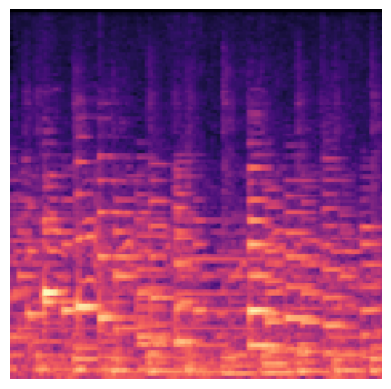

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/InstruNet-AI/data/spectrograms/pia/" +
                 os.listdir("/content/InstruNet-AI/data/spectrograms/pia")[0])

plt.imshow(img)
plt.axis("off")


In [ ]:
!ls /content/InstruNet-AI/data/spectrograms


gac  gel  pia  sax  tru


In [ ]:
import os
import pandas as pd

SPEC_PATH = "/content/InstruNet-AI/data/spectrograms"
OUTPUT_CSV = "/content/InstruNet-AI/data/labels.csv"

instruments = ["pia", "gac", "gel", "sax"]  # match folders exactly

data = []

for inst in instruments:
    folder = os.path.join(SPEC_PATH, inst)
    for file in os.listdir(folder):
        if file.endswith(".png"):
            data.append({
                "filepath": f"data/spectrograms/{inst}/{file}",
                "label": inst
            })

df = pd.DataFrame(data)
df.to_csv(OUTPUT_CSV, index=False)

print("labels.csv created successfully!")
print(df.head())


labels.csv created successfully!
                                            filepath label
0    data/spectrograms/pia/[pia][jaz_blu]1339__3.png   pia
1  data/spectrograms/pia/182__[pia][dru][cou_fol]...   pia
2        data/spectrograms/pia/[pia][cla]1497__1.png   pia
3  data/spectrograms/pia/155__[pia][nod][cla]1415...   pia
4    data/spectrograms/pia/[pia][jaz_blu]1514__2.png   pia


In [ ]:
!head /content/InstruNet-AI/data/labels.csv


filepath,label
data/spectrograms/pia/[pia][jaz_blu]1339__3.png,pia
data/spectrograms/pia/182__[pia][dru][cou_fol]1421__1.png,pia
data/spectrograms/pia/[pia][cla]1497__1.png,pia
data/spectrograms/pia/155__[pia][nod][cla]1415__3.png,pia
data/spectrograms/pia/[pia][jaz_blu]1514__2.png,pia
data/spectrograms/pia/[pia][cla]1499__1.png,pia
data/spectrograms/pia/027__[pia][nod][cla]1398__1.png,pia
data/spectrograms/pia/[pia][jaz_blu]1298__2.png,pia
data/spectrograms/pia/[pia][jaz_blu]1336__1.png,pia


In [ ]:
!pip install tensorflow scikit-learn pillow


In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image

labels_path = "/content/InstruNet-AI/data/labels.csv"
df = pd.read_csv(labels_path)

df.head()


,filepath,label
0,data/spectrograms/pia/[pia][jaz_blu]1339__3.png,pia
1,data/spectrograms/pia/182__[pia][dru][cou_fol]...,pia
2,data/spectrograms/pia/[pia][cla]1497__1.png,pia
3,data/spectrograms/pia/155__[pia][nod][cla]1415...,pia
4,data/spectrograms/pia/[pia][jaz_blu]1514__2.png,pia


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["label_encoded"] = label_encoder.fit_transform(df["label"])

df.head()


,filepath,label,label_encoded
0,data/spectrograms/pia/[pia][jaz_blu]1339__3.png,pia,2
1,data/spectrograms/pia/182__[pia][dru][cou_fol]...,pia,2
2,data/spectrograms/pia/[pia][cla]1497__1.png,pia,2
3,data/spectrograms/pia/155__[pia][nod][cla]1415...,pia,2
4,data/spectrograms/pia/[pia][jaz_blu]1514__2.png,pia,2


In [ ]:
IMG_SIZE = 128

X = []
y = []

for _, row in df.iterrows():
    img_path = os.path.join("/content/InstruNet-AI", row["filepath"])
    img = Image.open(img_path).convert("RGB")
    img = img.resize((IMG_SIZE, IMG_SIZE))

    X.append(np.array(img))
    y.append(row["label_encoded"])

X = np.array(X) / 255.0
y = np.array(y)

print(X.shape, y.shape)


(2746, 128, 128, 3) (2746,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_val.shape)


(2196, 128, 128, 3) (550, 128, 128, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = len(label_encoder.classes_)

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.3653 - loss: 1.3370 - val_accuracy: 0.4418 - val_loss: 1.2728
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.4679 - loss: 1.2434 - val_accuracy: 0.5382 - val_loss: 1.1296
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.5186 - loss: 1.1156 - val_accuracy: 0.6036 - val_loss: 0.9832
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6068 - loss: 0.9804 - val_accuracy: 0.6309 - val_loss: 0.9434
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.6042 - loss: 0.9276 - val_accuracy: 0.6455 - val_loss: 0.9024
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6685 - loss: 0.8428 - val_accuracy: 0.6582 - val_loss: 0.8672
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.6813 - loss: 0.7772 - val_accuracy: 0.6727 - val_loss: 0.8333
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7237 - loss: 0.6896 - val_accuracy: 0.6655 - val_loss:

In [ ]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print("Validation Accuracy:", val_acc)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - accuracy: 0.7187 - loss: 0.7759
Validation Accuracy: 0.696363627910614


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

MODEL_DIR = "/content/drive/MyDrive/InstruNet-AI/model"
os.makedirs(MODEL_DIR, exist_ok=True)

print("Model folder ready!")


Model folder ready!


In [ ]:
model.save("/content/drive/MyDrive/InstruNet-AI/model/instrunet_cnn.keras")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

DRIVE_BASE = "/content/drive/MyDrive/InstruNet-AI"
os.makedirs(DRIVE_BASE, exist_ok=True)

print("Drive folder ready!")


Drive folder ready!


In [ ]:
!cp -r /content/InstruNet-AI /content/drive/MyDrive/


In [ ]:
!cp -r /content/IRMAS-TrainingData /content/drive/MyDrive/


In [ ]:
!ls /content/drive/MyDrive/InstruNet-AI


data  model  preprocessing  reports  visualization


In [ ]:
!ls /content/drive/MyDrive/IRMAS-TrainingData/cla


'004__[cla][nod][cla]0242__1.wav'  '[cla][jaz_blu]0172__3.wav'
'004__[cla][nod][cla]0242__2.wav'  '[cla][jaz_blu]0176__1.wav'
'004__[cla][nod][cla]0242__3.wav'  '[cla][jaz_blu]0176__2.wav'
'012__[cla][nod][cla]0244__1.wav'  '[cla][jaz_blu]0176__3.wav'
'012__[cla][nod][cla]0244__2.wav'  '[cla][jaz_blu]0177__1.wav'
'012__[cla][nod][cla]0244__3.wav'  '[cla][jaz_blu]0177__2.wav'
'017__[cla][nod][cla]0150__1.wav'  '[cla][jaz_blu]0177__3.wav'
'017__[cla][nod][cla]0150__2.wav'  '[cla][jaz_blu]0178__1.wav'
'019__[cla][nod][cla]0223__1.wav'  '[cla][jaz_blu]0178__2.wav'
'019__[cla][nod][cla]0223__2.wav'  '[cla][jaz_blu]0178__3.wav'
'019__[cla][nod][cla]0223__3.wav'  '[cla][jaz_blu]0181__1.wav'
'021__[cla][nod][cla]0237__1.wav'  '[cla][jaz_blu]0181__2.wav'
'021__[cla][nod][cla]0237__2.wav'  '[cla][jaz_blu]0181__3.wav'
'021__[cla][nod][cla]0237__3.wav'  '[cla][jaz_blu]0182__1.wav'
'030__[cla][nod][cla]0240__1.wav'  '[cla][jaz_blu]0182__2.wav'
'030__[cla][nod][cla]0240__2.wav'  '[cla][jaz_blu]0182_

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

def save_mel_spectrogram(audio_path, save_path):
    y, sr = librosa.load(audio_path, mono=True)

    mel = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_mels=128,
        n_fft=4096,        # improved resolution
        hop_length=256
    )

    mel_db = librosa.power_to_db(mel, ref=np.max)

    plt.figure(figsize=(4, 4))
    librosa.display.specshow(mel_db, cmap="magma")
    plt.axis("off")
    plt.savefig(save_path, bbox_inches="tight", pad_inches=0)
    plt.close()


In [ ]:
def augment_audio(y, sr):
    y1 = librosa.effects.time_stretch(y, rate=0.9)
    y2 = librosa.effects.pitch_shift(y, sr=sr, n_steps=2)
    return [y1, y2]


In [ ]:
import os

y, sr = librosa.load(audio_path, mono=True)

# Define save_path for this example
# Extract instrument folder name from audio_path
inst_name = os.path.basename(os.path.dirname(audio_path))
# Create the output folder if it doesn't exist
output_folder = os.path.join(SPEC_PATH, inst_name)
os.makedirs(output_folder, exist_ok=True)

spec_name = os.path.basename(audio_path).replace(".wav", ".png")
save_path = os.path.join(output_folder, spec_name)

# original
save_mel_spectrogram(audio_path, save_path)

# augmented
augmented_audios = augment_audio(y, sr)
for i, aug in enumerate(augmented_audios):
    mel = librosa.feature.melspectrogram(
        y=aug, sr=sr, n_mels=128, n_fft=4096, hop_length=256
    )
    mel_db = librosa.power_to_db(mel, ref=np.max)

    plt.figure(figsize=(4,4))
    librosa.display.specshow(mel_db, cmap="magma")
    plt.axis("off")
    plt.savefig(save_path.replace(".png", f"_aug{i}.png"),
                bbox_inches="tight", pad_inches=0)
    plt.close()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load labels.csv
df = pd.read_csv("/content/InstruNet-AI/data/labels.csv")

# Encode string labels -> numbers
label_encoder = LabelEncoder()
df["label_encoded"] = label_encoder.fit_transform(df["label"])

# Check result
df.head()


,filepath,label,label_encoded
0,data/spectrograms/pia/[pia][jaz_blu]1339__3.png,pia,2
1,data/spectrograms/pia/182__[pia][dru][cou_fol]...,pia,2
2,data/spectrograms/pia/[pia][cla]1497__1.png,pia,2
3,data/spectrograms/pia/155__[pia][nod][cla]1415...,pia,2
4,data/spectrograms/pia/[pia][jaz_blu]1514__2.png,pia,2


In [ ]:
import numpy as np
import os
from PIL import Image

IMG_SIZE = 224

X, y = [], []

for _, row in df.iterrows():
    img_path = os.path.join("/content/InstruNet-AI", row["filepath"])

    img = Image.open(img_path).convert("RGB")
    img = img.resize((IMG_SIZE, IMG_SIZE))

    X.append(np.array(img))
    y.append(row["label_encoded"])

X = np.array(X) / 255.0
y = np.array(y)

print("Dataset loaded!")
print("X shape:", X.shape)
print("y shape:", y.shape)


Dataset loaded!
X shape: (2746, 224, 224, 3)
y shape: (2746,)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y),
    y=y
)

class_weights = dict(enumerate(class_weights))
class_weights


{0: np.float64(1.0777080062794349),
 1: np.float64(0.9032894736842105),
 2: np.float64(0.9521497919556172),
 3: np.float64(1.0931528662420382)}

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten,
    Dense, Dropout, BatchNormalization
)

num_classes = len(np.unique(y))

model = Sequential([
    Conv2D(32, (3,3), activation="relu",
           input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),

    Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,246,596 (84.86 MB)

 Trainable params: 22,246,148 (84.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/content/InstruNet-AI/data/labels.csv")

label_encoder = LabelEncoder()
df["label_encoded"] = label_encoder.fit_transform(df["label"])

df.head()


,filepath,label,label_encoded
0,data/spectrograms/pia/[pia][jaz_blu]1339__3.png,pia,2
1,data/spectrograms/pia/182__[pia][dru][cou_fol]...,pia,2
2,data/spectrograms/pia/[pia][cla]1497__1.png,pia,2
3,data/spectrograms/pia/155__[pia][nod][cla]1415...,pia,2
4,data/spectrograms/pia/[pia][jaz_blu]1514__2.png,pia,2


In [ ]:
import numpy as np
import os
from PIL import Image

IMG_SIZE = 224

X = []
y = []

for _, row in df.iterrows():
    img_path = os.path.join("/content/InstruNet-AI", row["filepath"])

    img = Image.open(img_path).convert("RGB")
    img = img.resize((IMG_SIZE, IMG_SIZE))

    X.append(np.array(img))
    y.append(row["label_encoded"])

X = np.array(X) / 255.0
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2746, 224, 224, 3)
y shape: (2746,)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=6,
    restore_best_weights=True
)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/content/InstruNet-AI/data/labels.csv")

label_encoder = LabelEncoder()
df["label_encoded"] = label_encoder.fit_transform(df["label"])

df.head()


,filepath,label,label_encoded
0,data/spectrograms/pia/[pia][jaz_blu]1339__3.png,pia,2
1,data/spectrograms/pia/182__[pia][dru][cou_fol]...,pia,2
2,data/spectrograms/pia/[pia][cla]1497__1.png,pia,2
3,data/spectrograms/pia/155__[pia][nod][cla]1415...,pia,2
4,data/spectrograms/pia/[pia][jaz_blu]1514__2.png,pia,2


In [ ]:
import numpy as np
import os
from PIL import Image

IMG_SIZE = 224

X = []
y = []

for _, row in df.iterrows():
    img_path = os.path.join("/content/InstruNet-AI", row["filepath"])

    img = Image.open(img_path).convert("RGB")
    img = img.resize((IMG_SIZE, IMG_SIZE))

    X.append(np.array(img))
    y.append(row["label_encoded"])

X = np.array(X) / 255.0
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2746, 224, 224, 3)
y shape: (2746,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(X_train.shape, X_val.shape)


(2196, 224, 224, 3) (550, 224, 224, 3)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))
class_weights


{0: np.float64(1.0785854616895874),
 1: np.float64(0.9029605263157895),
 2: np.float64(0.951473136915078),
 3: np.float64(1.093625498007968)}

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten,
    Dense, Dropout, BatchNormalization
)

num_classes = len(np.unique(y))  # SAFE way

model = Sequential([
    Conv2D(32, (3,3), activation="relu",
           input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),

    Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,246,596 (84.86 MB)

 Trainable params: 22,246,148 (84.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=6,
    restore_best_weights=True
)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp -r /content/InstruNet-AI /content/drive/MyDrive/


In [ ]:
!cp -r /content/IRMAS-TrainingData /content/drive/MyDrive/


In [ ]:
model.save("/content/drive/MyDrive/InstruNet-AI/model/instrunet_cnn.keras")


In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten,
    Dense, Dropout, BatchNormalization
)
from tensorflow.keras.callbacks import EarlyStopping

# 1. Load labels.csv and encode labels
df = pd.read_csv("/content/InstruNet-AI/data/labels.csv")
label_encoder = LabelEncoder()
df["label_encoded"] = label_encoder.fit_transform(df["label"])

# 2. Load images and prepare X, y
IMG_SIZE = 224

X, y = [], []

for _, row in df.iterrows():
    img_path = os.path.join("/content/InstruNet-AI", row["filepath"])
    img = Image.open(img_path).convert("RGB") # Ensure it's opened as RGB
    img = img.resize((IMG_SIZE, IMG_SIZE))
    img_array = np.array(img)

    # Explicitly ensure 3 channels
    if img_array.ndim == 2: # If it's grayscale (H, W)
        img_array = np.stack([img_array, img_array, img_array], axis=-1)
    elif img_array.ndim == 3 and img_array.shape[-1] == 1: # If it's (H, W, 1)
        img_array = np.repeat(img_array, 3, axis=-1)

    X.append(img_array)
    y.append(row["label_encoded"])

X = np.array(X) / 255.0
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)

# 3. Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)

# 4. Compute class weights
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

# 5. Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=6,
    restore_best_weights=True
)

# 6. Model Definition
num_classes = len(np.unique(y))  # Use y from the full dataset for num_classes

model = Sequential([
    Conv2D(32, (3,3), activation="relu",
           input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),

    Dense(num_classes, activation="softmax")
])

# 7. Model Compilation
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# 8. Model Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop]
)

X shape: (2746, 224, 224, 3)
y shape: (2746,)
X_train shape: (2196, 224, 224, 3)
X_val shape: (550, 224, 224, 3)
Class weights: {0: np.float64(1.0785854616895874), 1: np.float64(0.9029605263157895), 2: np.float64(0.951473136915078), 3: np.float64(1.093625498007968)}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,246,596 (84.86 MB)

 Trainable params: 22,246,148 (84.86 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 472s 7s/step - accuracy: 0.3965 - loss: 3.6466 - val_accuracy: 0.2618 - val_loss: 6.7194
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 463s 7s/step - accuracy: 0.5806 - loss: 1.0166 - val_accuracy: 0.2618 - val_loss: 13.0909
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 473s 6s/step - accuracy: 0.6419 - loss: 0.8961 - val_accuracy: 0.2618 - val_loss: 14.2555
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 412s 6s/step - accuracy: 0.6391 - loss: 0.8325 - val_accuracy: 0.3018 - val_loss: 13.2780
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 441s 6s/step - accuracy: 0.6918 - loss: 0.7521 - val_accuracy: 0.3764 - val_loss: 9.1486
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 412s 6s/step - accuracy: 0.7680 - loss: 0.5805 - val_accuracy: 0.4491 - val_loss: 4.0878
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 412s 6s/step - accuracy: 0.7795 - loss: 0.5823 - val_accuracy: 0.4582 - val_loss: 2.1496
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 415s 6s/step - accuracy: 0.8092 - loss: 0.4489 - val_accuracy: 0.5255 

In [ ]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print("Final Validation Accuracy:", (val_acc*100),"%")


18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7301 - loss: 0.7580
Final Validation Accuracy: 72.1818208694458 %


In [ ]:
model.save("/content/drive/MyDrive/InstruNet-AI/model/instrunet_cnn.keras")


In [ ]:
!cp -r /content/InstruNet-AI /content/drive/MyDrive/


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import drive

# Ensure Google Drive is mounted
drive.mount('/content/drive', force_remount=True)

# Ensure the project directory is present in /content/
!cp -r /content/drive/MyDrive/InstruNet-AI /content/

# 1. Load labels.csv and encode labels
df = pd.read_csv("/content/InstruNet-AI/data/labels.csv")
label_encoder = LabelEncoder()
df["label_encoded"] = label_encoder.fit_transform(df["label"])

# 2. Load images and prepare X, y
IMG_SIZE = 224 # Ensure this matches the training IMG_SIZE

X, y = [], []

for _, row in df.iterrows():
    img_path = os.path.join("/content/InstruNet-AI", row["filepath"])
    img = Image.open(img_path).convert("RGB")
    img = img.resize((IMG_SIZE, IMG_SIZE))

    X.append(np.array(img))
    y.append(row["label_encoded"])

X = np.array(X) / 255.0
y = np.array(y)

# 3. Train-test split to get X_val (as X_test was not created)
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Load the saved model
model = tf.keras.models.load_model("/content/drive/MyDrive/InstruNet-AI/model/instrunet_cnn.keras")

# Get predictions using X_val (as X_test was not defined)
# Predict on the first image in the validation set as an example
pred = model.predict(np.expand_dims(X_val[0], axis=0))[0]

# Get the class labels from the label_encoder
labels = label_encoder.classes_

print(f"Prediction for the first validation image ({labels[np.argmax(pred)]}):")
for label, p in zip(labels, pred):
    print(f"{label}: {p:.2f}")


Mounted at /content/drive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
Prediction for the first validation image (pia):
gac: 0.00
gel: 0.00
pia: 1.00
sax: 0.00


In [ ]:
import numpy as np

predicted_index = np.argmax(pred)
detected_instrument = labels[predicted_index]
confidence = float(pred[predicted_index])

print("Detected:", detected_instrument)
print("Confidence:", confidence)


Detected: pia
Confidence: 0.9998006224632263


In [ ]:
import json

result = {
    "audio_file": "test_audio.wav",
        "detected_instrument": detected_instrument,
            "confidence": confidence
            }


In [ ]:
json_path = "/content/drive/MyDrive/InstruNet-AI/reports/prediction.json"

with open(json_path, "w") as f:
    json.dump(result, f, indent=4)

    print("JSON report saved at:", json_path)


JSON report saved at: /content/drive/MyDrive/InstruNet-AI/reports/prediction.json


In [ ]:
with open(json_path, "r") as f:
      print(f.read())


{
    "audio_file": "test_audio.wav",
    "detected_instrument": "pia",
    "confidence": 0.9998006224632263
}


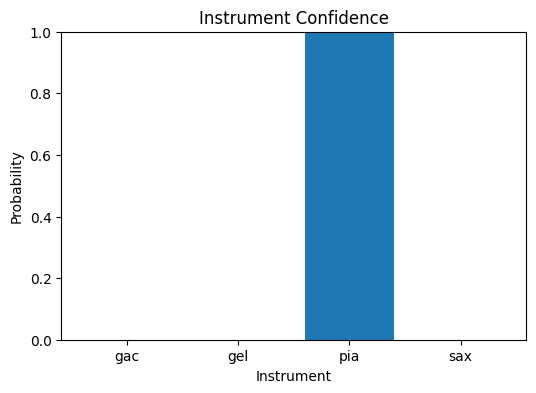

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(labels, pred)
plt.title("Instrument Confidence")
plt.xlabel("Instrument")
plt.ylabel("Probability")
plt.ylim(0,1)
plt.show()


In [ ]:
print("\nInstrument Intensity:")

for label, prob in zip(labels, pred):
    bars = "|" * int(prob * 20)
    print(f"{label}: {bars}")

def predict_segment(y, sr, model, labels, img_size=224):
    import matplotlib.pyplot as plt
    import librosa.display
    from PIL import Image
    import numpy as np

    mel = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_mels=128,
        n_fft=4096,
        hop_length=256
    )

    mel_db = librosa.power_to_db(mel, ref=np.max)

    plt.figure(figsize=(4,4))
    librosa.display.specshow(mel_db, cmap="magma")
    plt.axis("off")
    plt.savefig("temp_seg.png", bbox_inches="tight", pad_inches=0)
    plt.close()

    img = Image.open("temp_seg.png").convert("RGB")
    img = img.resize((img_size, img_size))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    pred = model.predict(img, verbose=0)[0]
    label = labels[np.argmax(pred)]
    confidence = np.max(pred)

    return label, confidence



Instrument Intensity:
gac: 
gel: 
pia: |||||||||||||||||||
sax: 


Time 0.0s → gac (0.43)


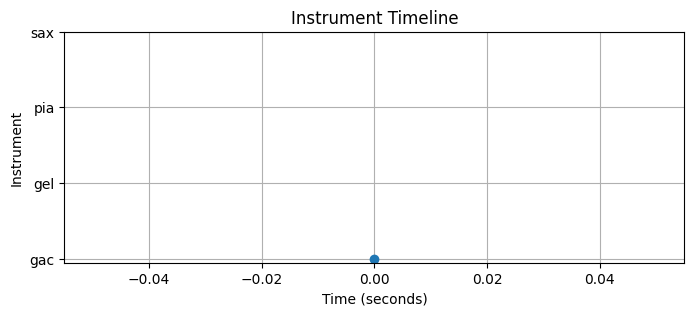

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt # Moved import here for correct scope

audio_path = "/content/test_audio.wav"  # change if needed
y, sr = librosa.load(audio_path, mono=True)

segment_duration = 3  # seconds
segment_length = int(sr * segment_duration)

results = []
times = []

for start in range(0, len(y), segment_length):
    end = start + segment_length
    segment = y[start:end]

    # Corrected condition for segment length
    if len(segment) < segment_length:
        break

    label, conf = predict_segment(segment, sr, model, labels)

    time_sec = start / sr
    times.append(time_sec)
    results.append(label)

    print(f"Time {time_sec:.1f}s → {label} ({conf:.2f})")

# Moved plotting code outside the loop to generate the full timeline after processing all segments
if results: # Only plot if there are results
    label_to_num = {label: i for i, label in enumerate(labels)}
    numeric_results = [label_to_num[l] for l in results]

    plt.figure(figsize=(8,3))
    plt.plot(times, numeric_results, marker='o')
    plt.yticks(list(label_to_num.values()), list(label_to_num.keys()))
    plt.xlabel("Time (seconds)")
    plt.ylabel("Instrument")
    plt.title("Instrument Timeline")
    plt.grid(True)
    plt.show()
else:
    print("No segments processed to create a timeline.")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
model.save("/content/drive/MyDrive/InstruNet-AI/model/instrunet_cnn.keras")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save("/content/drive/MyDrive/InstruNet-AI/model/instrunet_cnn.keras")


In [26]:
import pandas as pd
import os
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ---------------- LOAD LABELS ----------------
df = pd.read_csv("/content/drive/MyDrive/InstruNet-AI/data/labels.csv")

label_encoder = LabelEncoder()
df["label_encoded"] = label_encoder.fit_transform(df["label"])

print("Label order:", label_encoder.classes_)

# ---------------- SPLIT DATA ----------------
train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df["label_encoded"],
    random_state=42
)

# ---------------- VALIDATION GENERATOR ----------------
IMG_SIZE = 224
BATCH_SIZE = 32

val_datagen = ImageDataGenerator(rescale=1./255)

val_gen = val_datagen.flow_from_dataframe(
    val_df,
    directory="/content/drive/MyDrive/InstruNet-AI",
    x_col="filepath",
    y_col="label_encoded",
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode="raw",
    batch_size=BATCH_SIZE,
    shuffle=False
)

# ---------------- LOAD MODEL ----------------
model = tf.keras.models.load_model(
    "/content/drive/MyDrive/InstruNet-AI/model/instrunet_cnn.keras",
    compile=False
)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# ---------------- EVALUATE ----------------
loss, acc = model.evaluate(val_gen)

print("Validation accuracy:", acc)


Label order: ['gac' 'gel' 'pia' 'sax']
Found 550 validated image filenames.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7238 - loss: 0.7794
Validation accuracy: 0.7127272486686707
